In [29]:
import pandas as pd

# Creem un dataframe amb les vendes i la inversió en marketing (variable exogena) d'un any
df = pd.DataFrame({'vendes': [100, 120, 150, 180, 200, 210, 190, 170, 160, 180, 200, 220],
                   'marketing': [50, 60, 70, 80, 90, 100, 90, 80, 70, 80, 90, 100]})

# I generem una columna nova amb les dates, indicant que l'inici de cada 
# període és un mes (freq=MS)
df.index = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

<Axes: >

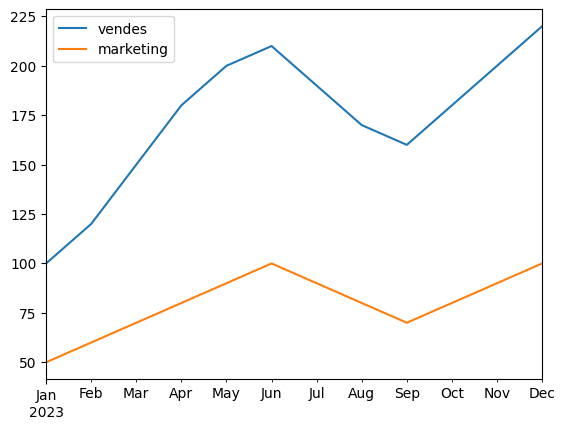

In [30]:
df.plot()

In [31]:
df

,vendes,marketing
2023-01-01,100,50
2023-02-01,120,60
2023-03-01,150,70
2023-04-01,180,80
2023-05-01,200,90
2023-06-01,210,100
2023-07-01,190,90
2023-08-01,170,80
2023-09-01,160,70
2023-10-01,180,80


El dataframe anterior conté només les dades mensuals de les vendes d'un any, pel que tenim només 12 files. Com que no és un conjunt excessivment gran, anem a fer un remostreig (reasample), de manera que, fent ús d'interpol·lació, obtinguem les dades de manera setnamal, i tinguem així 52 files de dades, amb les que ja podem establir uns lags i uns conjunts de tests i entrenament més grans.

In [32]:
# Creem un nou índex amb dates setmanals
new_index = pd.date_range(start='2023-01-01', end='2023-12-31', freq='W')
# Unim els índexs originals i nous
combined_index = df.index.union(new_index)
# Reindexem el dataframe original amb el nou índex combinat
df = df.reindex(combined_index)
# Omplim les dades mancants interpolant les dades existents
df = df.interpolate(method='time')

<Axes: >

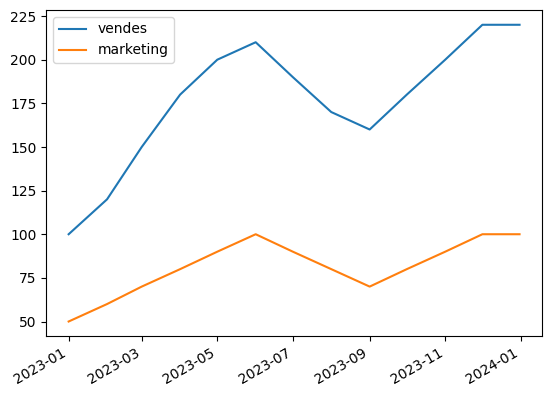

In [28]:
# Veiem-ho gràficament

df.plot()

In [38]:
# Creem ara 5 lags (les 5 setmanes anteriors)
for i in range(1, 6):
    df['Lag_vendes_' + str(i)] = df['vendes'].shift(i)

# I eliminem nuls
df=df.dropna()


In [65]:
df

,vendes,marketing,Lag_vendes_1,Lag_vendes_2,Lag_vendes_3,Lag_vendes_4,Lag_vendes_5
2023-02-01,120.000000,60.000000,118.064516,113.548387,109.032258,104.516129,100.000000
2023-02-05,124.285714,61.428571,120.000000,118.064516,113.548387,109.032258,104.516129
2023-02-12,131.785714,63.928571,124.285714,120.000000,118.064516,113.548387,109.032258
2023-02-19,139.285714,66.428571,131.785714,124.285714,120.000000,118.064516,113.548387
2023-02-26,146.785714,68.928571,139.285714,131.785714,124.285714,120.000000,118.064516
2023-03-01,150.000000,70.000000,146.785714,139.285714,131.785714,124.285714,120.000000
2023-03-05,153.870968,71.290323,150.000000,146.785714,139.285714,131.785714,124.285714
2023-03-12,160.645161,73.548387,153.870968,150.000000,146.785714,139.285714,131.785714
2023-03-19,167.419355,75.806452,160.645161,153.870968,150.000000,146.785714,139.285714
2023-03-26,174.193548,78.064516,167.419355,160.645161,153.870968,150.000000,146.785714


In [51]:
# Dividim les dades en entrenament i prova

# Calculem les proporcions
longitud=len(df)
longitud_test=int(longitud*0.2)

print("Dividint el conjunt de test amb ", longitud_test, " files d'un total de ", longitud)

steps=longitud_test
train_set=df[:-steps]
test_set=df[-steps:]


Dividint el conjunt de test amb  11  files d'un total de  58


In [54]:
# Dividim variables i variable objectiu

Y_test=test_set["vendes"].copy()
X_test=test_set.drop("vendes", axis=1)

Y_train=train_set["vendes"].copy()
X_train=train_set.drop("vendes", axis=1)

In [57]:
# Generem el model i fem l'entrenament

from sklearn.linear_model import LinearRegression

modelRL = LinearRegression()
modelRL.fit(X_train, Y_train)


LinearRegression()

In [58]:
# I fem les prediccions

y_pred = modelRL.predict(X_test)

In [60]:
# Definim algunes funcions d'utilitat
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def mostraMetriques(y_test, y_pred):
    eam=mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse=mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    print('EAM: %f' % eam)
    print('MSE: %f' % mse)
    print('RMSE: %f' % rmse)
    print('R2: %f' % r2)

import matplotlib.pyplot as plt

def dibuixaSerie(y_test, y_pred):

    # Creem un dataframe amb les prediccions
    y_pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=['y_pred'])

    # Ordenem els índex
    y_test = y_test.sort_index()
    y_pred_df = y_pred_df.sort_index()

    # Dibuixa les dades
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='Etiquetes reals')
    plt.plot(y_pred_df, label='Prediccions')
    plt.title('Comparació entre les etiquetes reals i les prediccions')
    plt.xlabel('Data')
    plt.ylabel('Valor')
    plt.legend()
    plt.show()

In [61]:
print("Mètriques:")
mostraMetriques(Y_test, y_pred)

Mètriques:
EAM: 1.290437
MSE: 2.039447
RMSE: 1.428092
R2: 0.962234


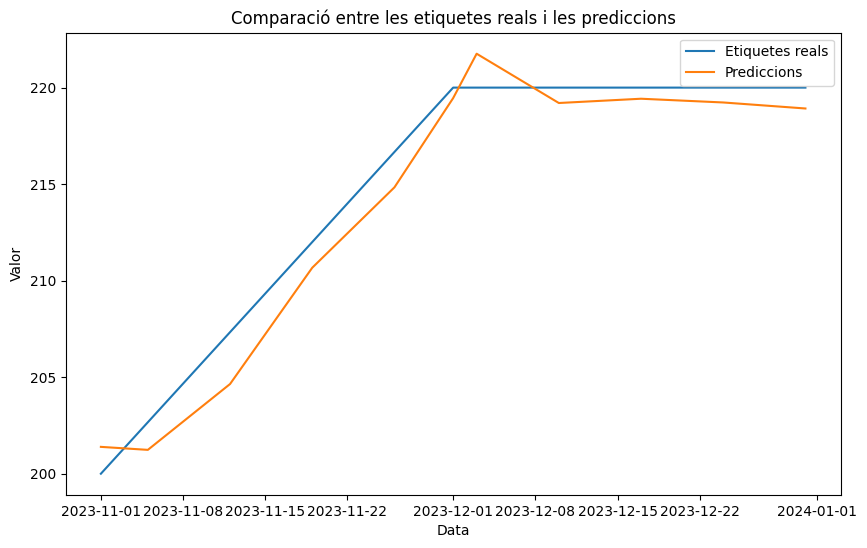

In [64]:
dibuixaSerie(Y_test, y_pred)